In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Reading dataset

day_pd = pd.read_csv("C:\\Users\\Dell\\Downloads\\day.csv")
day_pd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Total number of columns and rows

day_pd.shape

(730, 16)

In [4]:
day_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Descriptive statistics

day_pd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Note: Total 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.

# Data Quality Checks

In [6]:
# check Null values

day_pd.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Check duplicate value in the dataset

day_pd_dup = day_pd
day_pd_dup.drop_duplicates(subset=None, inplace=True)

In [8]:
day_pd_dup.shape

(730, 16)

Note:
1. No Missing or Null values in the original dataset.
2. No duplicates data in the original dataset.

# Data Cleaning

In [9]:
# Removing unwanted coloumns

day_pd.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Note: Remove the unwanted columns for our analaysis (instant,             dteday, casual & registered).

In [10]:
# Creating a new dataframe

day_pd_new = day_pd[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum'
                     , 'windspeed', 'cnt']]
day_pd_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Creating Dummy Variables

Create Dummy variables for the categorical variables namely, 'mnth, weekday, season and weathersit'.

In [11]:
# Viewing the dataset

day_pd_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [12]:
# Converting columns into categories

day_pd_new.season = day_pd_new.season.astype('category')
day_pd_new.weekday = day_pd_new.weekday.astype('category')
day_pd_new.mnth = day_pd_new.mnth.astype('category')
day_pd_new.weathersit = day_pd_new.weathersit.astype('category')
day_pd_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
# Dropping the first variable (n-1)
day_pd_new = pd.get_dummies(day_pd_new, drop_first=True)
day_pd_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

# Train/Test set(70:30 ratio)

In [14]:
day_train, day_test = train_test_split(day_pd_new, train_size = 0.70, random_state=100)


In [15]:
# train set

day_train.shape

(510, 30)

In [16]:
# test set

day_test.shape

(220, 30)

# Exploratory Data Analysis

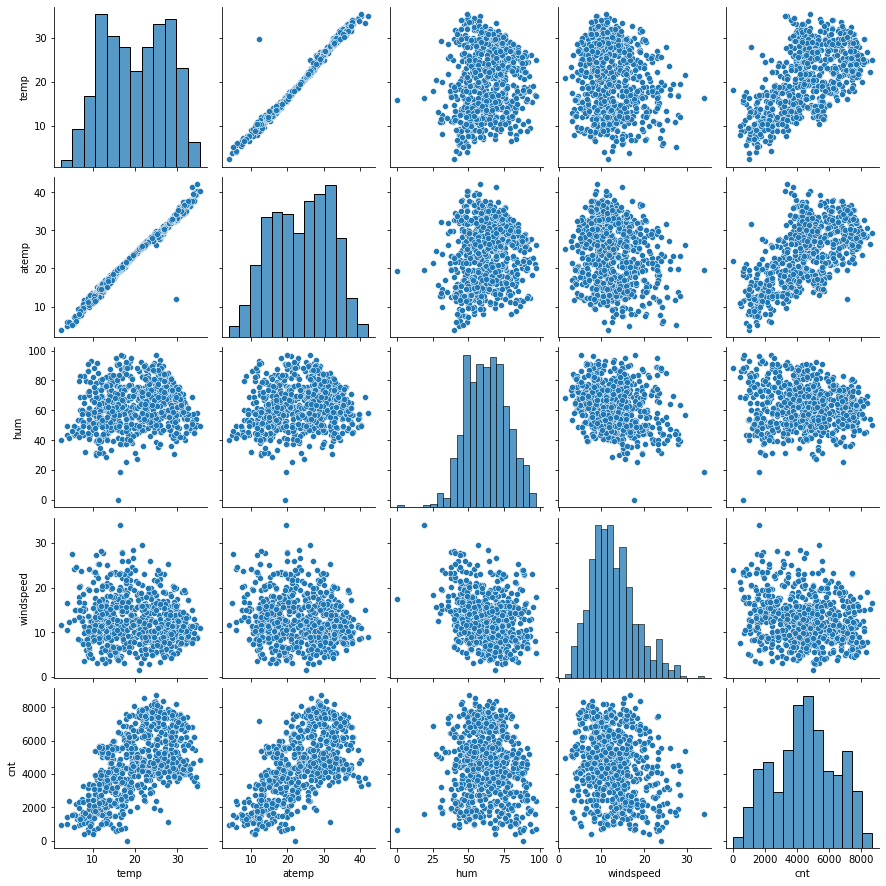

In [17]:
# Creating pairplot 

day_pd_num = day_pd_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(day_pd_num)
plt.show()

Note: From the pairplots we see that there is a relation among 'temp', 'atemp' & 'cnt'.

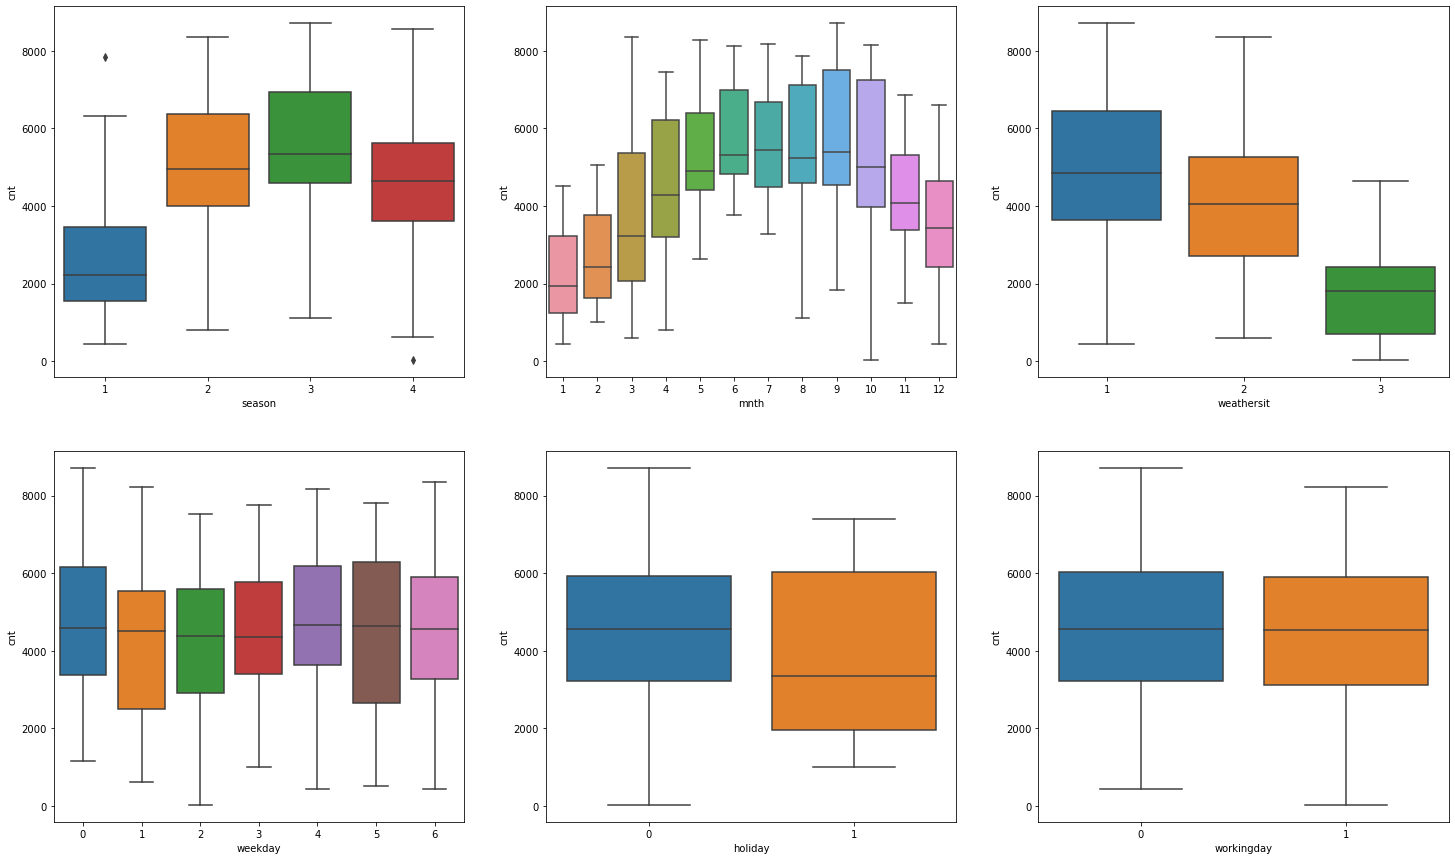

In [18]:
# Making boxplots

plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=day_pd)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=day_pd)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=day_pd)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=day_pd)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=day_pd)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=day_pd)

plt.show()

Note:
1. From the "Season" boxplot we can see that almost 5000 bookings are from the season_3 compared to the other seasons.
2. From the "Weathersit" boxplot we can say that maximum bookings happened in the weather 1 and it has some trends during the course of 2 years and it can be a good predictor variable for predicting the demand for the bikes.
3. From the "Mnth" boxplot we can see that the months are following a trend and could be a good predictor variable. The bookings in the mid-month are above 4000.
4. From the "holiday" Almost most of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
5. From the "Weekday" boxplot we can see that there seems no trend in the weekday dataset thus we can leave this variable for the prediction.
6.From the "Workingday" boxplot we can see that maximum bookings happening between 4000 and 6000.

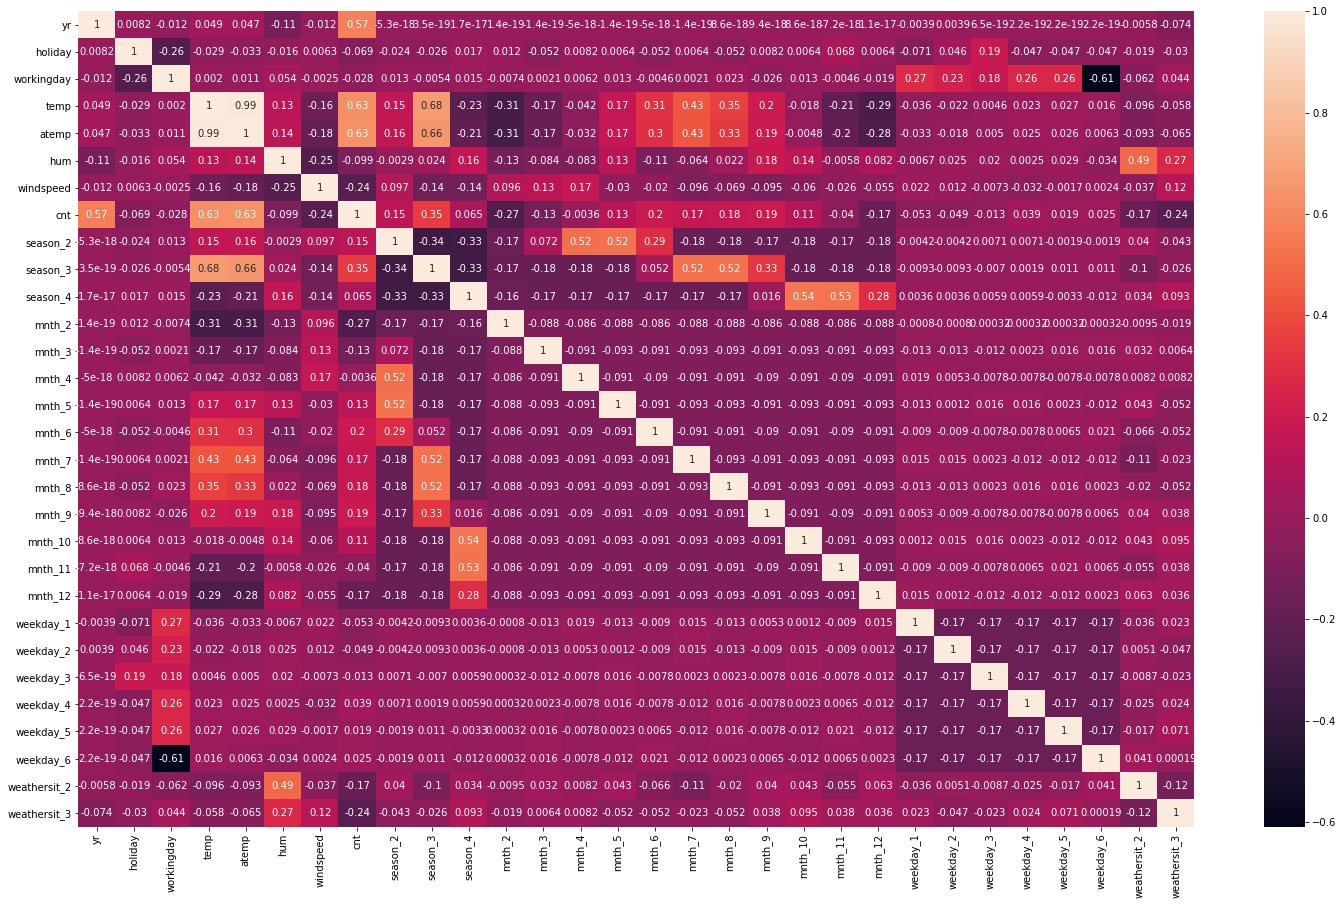

In [19]:
# co-reletion

plt.figure(figsize=(25,15))

sns.heatmap(day_pd_new.corr(), annot=True,)

plt.show()

Note: High co-linearity between 'cnt, temp', 'season_3, temp', 'temp, atemp'in heatmap

In [20]:
# Rescaling Features

scaler = MinMaxScaler()

In [21]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Creating a list of numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

<ipython-input-22-c03de35907a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_train[num_vars] = scaler.fit_transform(day_train[num_vars])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [23]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
 # Descriptive statistics

day_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Building Linear Model

y_train = day_train.pop('cnt')
X_train = day_train

In [26]:
# LinearRegression function from the SciKit Learn

lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE function

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
# Storing the 'True' columns from the rfe.support_ list

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [30]:
# Creating X_test df with the RFE selected vars.

X_train_rfe = X_train[col]

# 1. Stats Model

In [31]:
# VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) 
              for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
13,weathersit_2,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


In [32]:
# Adding a constant

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a first fitted model

lr1 = sm.OLS(y_train, X_train_sm1)

# Using the .fit() function

lr1_model = lr1.fit()

# Checking the parameters

lr1_model.params

const           0.237384
yr              0.230442
holiday        -0.088900
temp            0.486920
hum            -0.179606
windspeed      -0.183865
season_2        0.116592
season_3        0.042479
season_4        0.152975
mnth_3          0.032292
mnth_5          0.028201
mnth_8          0.050905
mnth_9          0.120667
mnth_10         0.040741
weathersit_2   -0.054170
weathersit_3   -0.242870
dtype: float64

In [33]:
# Printing the summary 

lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.00e-188
Time:                        08:28:53   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
yr               0.2304      0.008     28.453      0.000       0.215       0.246
holiday         -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Stats Model

In [34]:
# 'temp'variable has high VIF value so we are removing.

X_train_new = X_train_rfe.drop(['temp'], axis=1)

# VIF Check


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) 
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,10.09
3,windspeed,3.72
5,season_3,3.58
6,season_4,2.86
4,season_2,2.50
0,yr,1.98
12,weathersit_2,1.98
9,mnth_8,1.85
8,mnth_5,1.63
11,mnth_10,1.56


In [35]:
# Adding a constant

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr2 = sm.OLS(y_train, X_train_sm2)

# Using the .fit() function

lr2_model = lr2.fit()

# Checking the parameters

lr2_model.params

const           0.312248
yr              0.246908
holiday        -0.087894
hum            -0.068388
windspeed      -0.179851
season_2        0.239935
season_3        0.288548
season_4        0.204628
mnth_3          0.050082
mnth_5          0.072596
mnth_8          0.047189
mnth_9          0.105582
mnth_10         0.095908
weathersit_2   -0.083650
weathersit_3   -0.293131
dtype: float64

In [36]:
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     127.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.23e-153
Time:                        08:28:53   Log-Likelihood:                 427.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     495   BIC:                            -761.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3122      0.032      9.817      0.000       0.250       0.375
yr               0.2469      0.009     26.030      0.000       0.228       0.266
holiday         -0.0879      0.030     -2.913      0.004      -0.147      -0.029
hum             -0.0684      0.044     -1.557      0.120      -0.155       0.018
windspeed       -0.1799      0.030     -5.920      0.000      -0.240      -0.120
season_2         0.2399      0.015     15.848      0.000       0.210       0.270
season_3         0.2885      0.018     16.249      0.000       0.254       0.323
season_4         0.2046      0.016     12.637      0.000       0.173       0.236
mnth_3           0.0501      0.017      2.889      0.004       0.016       0.084
mnth_5           0.0726      0.021      3.493      0.001       0.032       0.113
mnth_8           0.0472      0.021      2.282      0.023       0.007       0.088
mnth_9           0.1056      0.020      5.173      0.000       0.065       0.146
mnth_10          0.0959      0.020      4.720      0.000       0.056       0.136
weathersit_2    -0.0836      0.012     -6.907      0.000      -0.107      -0.060
weathersit_3    -0.2931      0.031     -9.453      0.000      -0.354      -0.232
==============================================================================
Omnibus:                       51.215   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.835
Skew:                          -0.527   Prob(JB):                     1.29e-27
Kurtosis:                       5.172   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Stats Model

In [37]:
# Droping 'mnth_8' variable because high P-Value.

X_train_new = X_train_new.drop(['mnth_8'], axis=1)

In [38]:
# VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) 
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,10.09
3,windspeed,3.72
6,season_4,2.86
5,season_3,2.62
4,season_2,2.50
0,yr,1.97
11,weathersit_2,1.97
8,mnth_5,1.63
10,mnth_10,1.56
7,mnth_3,1.31


In [39]:
# Adding a constant

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr3 = sm.OLS(y_train, X_train_sm3)

# Using the .fit() function

lr3_model = lr3.fit()

# Checking the parameters

lr3_model.params

const           0.307180
yr              0.247742
holiday        -0.088904
hum            -0.061426
windspeed      -0.179497
season_2        0.239819
season_3        0.309666
season_4        0.206099
mnth_3          0.050152
mnth_5          0.071685
mnth_9          0.087966
mnth_10         0.093856
weathersit_2   -0.082393
weathersit_3   -0.296410
dtype: float64

In [40]:
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.36e-153
Time:                        08:36:50   Log-Likelihood:                 424.86
No. Observations:                 510   AIC:                            -821.7
Df Residuals:                     496   BIC:                            -762.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3072      0.032      9.640      0.000       0.245       0.370
yr               0.2477      0.010     26.028      0.000       0.229       0.266
holiday         -0.0889      0.030     -2.934      0.003      -0.148      -0.029
hum             -0.0614      0.044     -1.396      0.163      -0.148       0.025
windspeed       -0.1795      0.031     -5.884      0.000      -0.239      -0.120
season_2         0.2398      0.015     15.773      0.000       0.210       0.270
season_3         0.3097      0.015     20.348      0.000       0.280       0.340
season_4         0.2061      0.016     12.684      0.000       0.174       0.238
mnth_3           0.0502      0.017      2.881      0.004       0.016       0.084
mnth_5           0.0717      0.021      3.435      0.001       0.031       0.113
mnth_9           0.0880      0.019      4.636      0.000       0.051       0.125
mnth_10          0.0939      0.020      4.604      0.000       0.054       0.134
weathersit_2    -0.0824      0.012     -6.782      0.000      -0.106      -0.059
weathersit_3    -0.2964      0.031     -9.528      0.000      -0.358      -0.235
==============================================================================
Omnibus:                       50.524   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.391
Skew:                          -0.530   Prob(JB):                     1.96e-26
Kurtosis:                       5.109   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Stats Model

In [ ]:
# Dropping the 'season_3' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['season_3'], axis=1)

In [42]:
# VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,10.09
3,windspeed,3.72
6,season_4,2.86
5,season_3,2.62
4,season_2,2.50
0,yr,1.97
11,weathersit_2,1.97
8,mnth_5,1.63
10,mnth_10,1.56
7,mnth_3,1.31


In [43]:
# Adding a constant

X_train_sm4 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr4 = sm.OLS(y_train, X_train_sm4)

# Using the .fit() function

lr4_model = lr4.fit()

# Checking the parameters

lr4_model.params

const           0.307180
yr              0.247742
holiday        -0.088904
hum            -0.061426
windspeed      -0.179497
season_2        0.239819
season_3        0.309666
season_4        0.206099
mnth_3          0.050152
mnth_5          0.071685
mnth_9          0.087966
mnth_10         0.093856
weathersit_2   -0.082393
weathersit_3   -0.296410
dtype: float64

In [44]:
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.36e-153
Time:                        08:44:26   Log-Likelihood:                 424.86
No. Observations:                 510   AIC:                            -821.7
Df Residuals:                     496   BIC:                            -762.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3072      0.032      9.640      0.000       0.245       0.370
yr               0.2477      0.010     26.028      0.000       0.229       0.266
holiday         -0.0889      0.030     -2.934      0.003      -0.148      -0.029
hum             -0.0614      0.044     -1.396      0.163      -0.148       0.025
windspeed       -0.1795      0.031     -5.884      0.000      -0.239      -0.120
season_2         0.2398      0.015     15.773      0.000       0.210       0.270
season_3         0.3097      0.015     20.348      0.000       0.280       0.340
season_4         0.2061      0.016     12.684      0.000       0.174       0.238
mnth_3           0.0502      0.017      2.881      0.004       0.016       0.084
mnth_5           0.0717      0.021      3.435      0.001       0.031       0.113
mnth_9           0.0880      0.019      4.636      0.000       0.051       0.125
mnth_10          0.0939      0.020      4.604      0.000       0.054       0.134
weathersit_2    -0.0824      0.012     -6.782      0.000      -0.106      -0.059
weathersit_3    -0.2964      0.031     -9.528      0.000      -0.358      -0.235
==============================================================================
Omnibus:                       50.524   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.391
Skew:                          -0.530   Prob(JB):                     1.96e-26
Kurtosis:                       5.109   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Stats Model

In [ ]:
# Dropping the 'hum' columns

X_train_new = X_train_new.drop(['hum'], axis=1)

In [45]:
# VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,10.09
3,windspeed,3.72
6,season_4,2.86
5,season_3,2.62
4,season_2,2.50
0,yr,1.97
11,weathersit_2,1.97
8,mnth_5,1.63
10,mnth_10,1.56
7,mnth_3,1.31


In [46]:
# Adding a constant

X_train_sm5 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr5 = sm.OLS(y_train, X_train_sm5)

# Using the .fit() function

lr5_model = lr5.fit()

# Checking the parameters

lr5_model.params

const           0.307180
yr              0.247742
holiday        -0.088904
hum            -0.061426
windspeed      -0.179497
season_2        0.239819
season_3        0.309666
season_4        0.206099
mnth_3          0.050152
mnth_5          0.071685
mnth_9          0.087966
mnth_10         0.093856
weathersit_2   -0.082393
weathersit_3   -0.296410
dtype: float64

In [47]:
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.36e-153
Time:                        08:48:27   Log-Likelihood:                 424.86
No. Observations:                 510   AIC:                            -821.7
Df Residuals:                     496   BIC:                            -762.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3072      0.032      9.640      0.000       0.245       0.370
yr               0.2477      0.010     26.028      0.000       0.229       0.266
holiday         -0.0889      0.030     -2.934      0.003      -0.148      -0.029
hum             -0.0614      0.044     -1.396      0.163      -0.148       0.025
windspeed       -0.1795      0.031     -5.884      0.000      -0.239      -0.120
season_2         0.2398      0.015     15.773      0.000       0.210       0.270
season_3         0.3097      0.015     20.348      0.000       0.280       0.340
season_4         0.2061      0.016     12.684      0.000       0.174       0.238
mnth_3           0.0502      0.017      2.881      0.004       0.016       0.084
mnth_5           0.0717      0.021      3.435      0.001       0.031       0.113
mnth_9           0.0880      0.019      4.636      0.000       0.051       0.125
mnth_10          0.0939      0.020      4.604      0.000       0.054       0.134
weathersit_2    -0.0824      0.012     -6.782      0.000      -0.106      -0.059
weathersit_3    -0.2964      0.031     -9.528      0.000      -0.358      -0.235
==============================================================================
Omnibus:                       50.524   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.391
Skew:                          -0.530   Prob(JB):                     1.96e-26
Kurtosis:                       5.109   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6. Stats Model

In [48]:
# Dropping the 'mnth_5' columns

X_train_new = X_train_new.drop(['mnth_5'], axis=1)

In [49]:
# VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,9.73
3,windspeed,3.67
6,season_4,2.83
5,season_3,2.59
4,season_2,2.07
0,yr,1.97
10,weathersit_2,1.97
9,mnth_10,1.56
8,mnth_9,1.29
7,mnth_3,1.26


In [50]:
# Adding a constant

X_train_sm6 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr6 = sm.OLS(y_train, X_train_sm6)

# Using the .fit() function

lr6_model = lr6.fit()

# Checking the parameters

lr6_model.params

const           0.297700
yr              0.246819
holiday        -0.091808
hum            -0.035643
windspeed      -0.184341
season_2        0.261728
season_3        0.305089
season_4        0.201331
mnth_3          0.039633
mnth_9          0.086436
mnth_10         0.092956
weathersit_2   -0.084484
weathersit_3   -0.304273
dtype: float64

In [51]:
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     142.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.65e-152
Time:                        08:51:55   Log-Likelihood:                 418.86
No. Observations:                 510   AIC:                            -811.7
Df Residuals:                     497   BIC:                            -756.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2977      0.032      9.278      0.000       0.235       0.361
yr               0.2468      0.010     25.664      0.000       0.228       0.266
holiday         -0.0918      0.031     -2.999      0.003      -0.152      -0.032
hum             -0.0356      0.044     -0.813      0.416      -0.122       0.050
windspeed       -0.1843      0.031     -5.984      0.000      -0.245      -0.124
season_2         0.2617      0.014     18.761      0.000       0.234       0.289
season_3         0.3051      0.015     19.909      0.000       0.275       0.335
season_4         0.2013      0.016     12.303      0.000       0.169       0.233
mnth_3           0.0396      0.017      2.288      0.023       0.006       0.074
mnth_9           0.0864      0.019      4.508      0.000       0.049       0.124
mnth_10          0.0930      0.021      4.512      0.000       0.052       0.133
weathersit_2    -0.0845      0.012     -6.888      0.000      -0.109      -0.060
weathersit_3    -0.3043      0.031     -9.703      0.000      -0.366      -0.243
==============================================================================
Omnibus:                       50.142   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.139
Skew:                          -0.560   Prob(JB):                     8.96e-24
Kurtosis:                       4.934   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. Stats Model

In [52]:
# Dropping 'mnth_3'

X_train_new = X_train_new.drop(['mnth_3'], axis=1)

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) 
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,9.37
3,windspeed,3.57
6,season_4,2.66
5,season_3,2.41
4,season_2,2.04
0,yr,1.97
9,weathersit_2,1.97
8,mnth_10,1.56
7,mnth_9,1.29
10,weathersit_3,1.14


In [54]:
# Adding a constant

X_train_sm7 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr7 = sm.OLS(y_train, X_train_sm7)

# Using the .fit() function

lr7_model = lr7.fit()

# Checking the parameters

lr7_model.params

const           0.309061
yr              0.246887
holiday        -0.096341
hum            -0.039327
windspeed      -0.181492
season_2        0.257244
season_3        0.295189
season_4        0.191562
mnth_9          0.086798
mnth_10         0.092713
weathersit_2   -0.084216
weathersit_3   -0.300555
dtype: float64

In [55]:
lr7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.83e-152
Time:                        09:01:10   Log-Likelihood:                 416.19
No. Observations:                 510   AIC:                            -808.4
Df Residuals:                     498   BIC:                            -757.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3091      0.032      9.708      0.000       0.247       0.372
yr               0.2469      0.010     25.562      0.000       0.228       0.266
holiday         -0.0963      0.031     -3.140      0.002      -0.157      -0.036
hum             -0.0393      0.044     -0.894      0.372      -0.126       0.047
windspeed       -0.1815      0.031     -5.872      0.000      -0.242      -0.121
season_2         0.2572      0.014     18.546      0.000       0.230       0.284
season_3         0.2952      0.015     19.996      0.000       0.266       0.324
season_4         0.1916      0.016     12.075      0.000       0.160       0.223
mnth_9           0.0868      0.019      4.508      0.000       0.049       0.125
mnth_10          0.0927      0.021      4.481      0.000       0.052       0.133
weathersit_2    -0.0842      0.012     -6.838      0.000      -0.108      -0.060
weathersit_3    -0.3006      0.031     -9.557      0.000      -0.362      -0.239
==============================================================================
Omnibus:                       42.403   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.668
Skew:                          -0.438   Prob(JB):                     1.38e-22
Kurtosis:                       4.992   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8. Stats Model

In [56]:
# Dropping 'mnth_10'

X_train_new = X_train_new.drop(['mnth_10'], axis=1)

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,9.37
3,windspeed,3.57
5,season_3,2.41
6,season_4,2.18
4,season_2,2.04
0,yr,1.97
8,weathersit_2,1.97
7,mnth_9,1.27
9,weathersit_3,1.13
1,holiday,1.04


In [58]:
# Adding a constant

X_train_sm8 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr8 = sm.OLS(y_train, X_train_sm8)

# Using the .fit() function

lr8_model = lr8.fit()

# Checking the parameters

lr8_model.params

const           0.296728
yr              0.246839
holiday        -0.100100
hum            -0.021937
windspeed      -0.175011
season_2        0.256464
season_3        0.296884
season_4        0.222266
mnth_9          0.077109
weathersit_2   -0.085628
weathersit_3   -0.290125
dtype: float64

In [59]:
lr8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.24e-149
Time:                        09:03:34   Log-Likelihood:                 406.11
No. Observations:                 510   AIC:                            -790.2
Df Residuals:                     499   BIC:                            -743.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2967      0.032      9.182      0.000       0.233       0.360
yr               0.2468      0.010     25.082      0.000       0.228       0.266
holiday         -0.1001      0.031     -3.203      0.001      -0.161      -0.039
hum             -0.0219      0.045     -0.491      0.623      -0.110       0.066
windspeed       -0.1750      0.031     -5.563      0.000      -0.237      -0.113
season_2         0.2565      0.014     18.147      0.000       0.229       0.284
season_3         0.2969      0.015     19.743      0.000       0.267       0.326
season_4         0.2223      0.015     15.246      0.000       0.194       0.251
mnth_9           0.0771      0.019      3.955      0.000       0.039       0.115
weathersit_2    -0.0856      0.013     -6.825      0.000      -0.110      -0.061
weathersit_3    -0.2901      0.032     -9.079      0.000      -0.353      -0.227
==============================================================================
Omnibus:                       26.125   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.048
Skew:                          -0.293   Prob(JB):                     3.03e-12
Kurtosis:                       4.467   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note : Stats Model 8 has very low Multicollinearity between P-value and Predictors.

# Final Model Interpretation:

1. Hypothesis Testing:
    Setup Null and Alternative Hypothesis:
    
H0 : X1 = X2 = X3 = ... = Xn = 0

H1 : Xi! = 0
    
    
2. Model Co-efficient values,

constant = 0.2967

yr = 0.2468

holiday = -0.1001

hum = -0.0219

windspeed = -0.1750

season_2 = 0.2565

season_3 = 0.2969

season_4 = 0.2223

mnth_9 = 0.0771

weathersit_2 = -0.0856

weathersit_3 = -0.2901

Note : Stats Model 8 that none of coefficient value is equal to 0 so we Reject Null Hypothesis.
    
3. F - Statistics:
    
F-Statistic is used for overall significance of the model.

The F-Statistic value: 160.7
The Prob(F-Statistic) value : 5.24e-149
So, as the P-Value is ~0.000 and from the F-Statistic data we can conclude that our prediction model is significant.

4. Equation for the best fit line: Model Co-efficient values
    cnt = 0.2967 + 0.2468 + (-0.1001) + (-0.0219) + (-0.1750) + 0.2565 + 0.2969 + 0.2223 +0.0771 + (-0.0856) + (-0.2901)
    
5. Interpretation of Equation:

    yr = Bike hiring will increase by 0.22468 values.
    
    holiday = Bike hiring will decrease by 0.1001 values.
    
    hum = Bike hiring will decrease by 0.0219 values.
    
    windspeed = Bike hiring will decrease by 0.1750 values.
    
    season_2 = Bike hiring will increase by 0.2565 values.
    
    season_3 = Bike hiring will increase by 0.2969 values.
    
    season_4 = Bike hiring will increase by 0.2223 values.
    
    mnth_9 = Bike hiring will increase by 0.0771 values.
    
    weathersit_2 = Bike hiring will decrease by -0.0856 values.
    
    weathersit_3 = Bike hiring will decrease by -0.2901 values.


# Residual Analysis

In [61]:
y_train_pd = lr8_model.predict(X_train_sm8)

res = y_train - y_train_pd

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


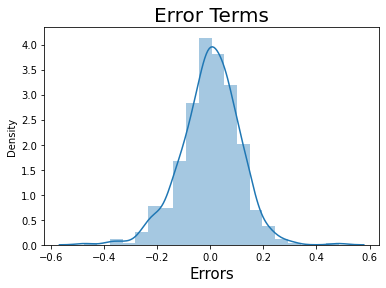

In [63]:
# plot Histogram

sns.distplot((res), bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)

plt.show()

Note : Assumption for Linear Regression is valid because residuals are normally distributed.

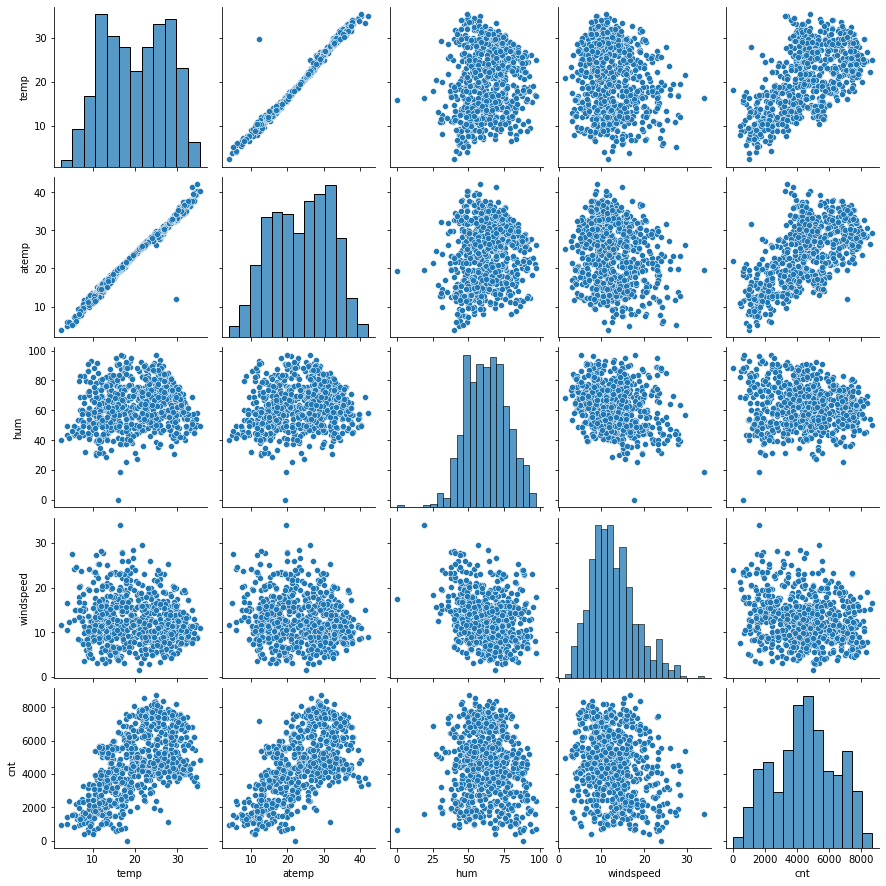

In [66]:
# Creating pairplot

day_pd_num = day_pd_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(day_pd_num)
plt.show()

Note : There is linear reletion between temp and atemp variable with the predictor 'cnt'

In [67]:
# VIF Check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)
              for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,hum,9.37
3,windspeed,3.57
5,season_3,2.41
6,season_4,2.18
4,season_2,2.04
0,yr,1.97
8,weathersit_2,1.97
7,mnth_9,1.27
9,weathersit_3,1.13
1,holiday,1.04


Note :From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables.

# Prediction

In [68]:
# Using scaler.transform

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.head()

<ipython-input-68-ac57ad8cac0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_test[num_vars] = scaler.transform(day_test[num_vars])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
# descriptive statistics

day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    float64
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null  

In [70]:
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# dividing into X_test and y_test

y_test = day_test.pop('cnt')
X_test = day_test

In [72]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [73]:
# Selecting the variables

col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test df

X_test_sm8 = sm.add_constant(X_test)
X_test_sm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   hum           220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_3      220 non-null    uint8  
 7   season_4      220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [76]:
X_test.shape

(220, 10)

In [77]:
# Formula for R^2 adjusted: R^2 adj. = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.731187227802707

In [82]:
# R^2 Value for Test data

# Making Prediction

y_pd = lr8_model.predict(X_test_sm8)

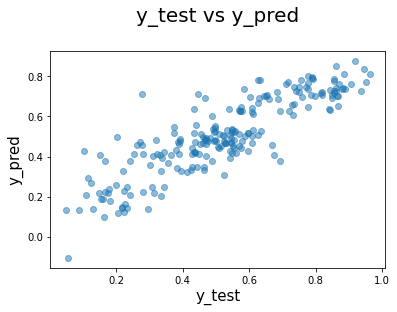

In [83]:
# Plotting y_test and y_pred to understand

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('y_test vs y_pred\n', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.show()

In [84]:
r2_score(y_test, y_pd)

0.7434617836108025

# Final Comparision of the result

Train R^2 : 0.783
    
Train Adjusted R^2 : 0.758
    
Test R^2 : 0.7434617836108025
    
Test Adjusted R^2 : 0.731187227802707
    
The model seems to have predicted pretty well.

Note : 

    The details of weathersit_1 & weathersit_3:
        
  - weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    
  - weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 
    
The details of season1, season_3 & season4:
    
  - season1: spring
    
  - season3: fall
    
  - season4: winter

As per the Final Model, Predictor Variables that are needed for the prediction purposes are:
    
- YR - Coefficient of yr indicates that a unit increase in yr variable, will increase bike hirings by 0.2468 values.

- HOLIDAY - Coefficient of holiday indicates that a unit increase in holiday variable, will decrease the bike hiring by -0.1001 values.

hum = Bike hiring will decrease by 0.0219 values.

windspeed = Bike hiring will decrease by 0.1750 values.

season_2 = Bike hiring will increase by 0.2565 values.

season_3 = Bike hiring will increase by 0.2969 values.

season_4 = Bike hiring will increase by 0.2223 values.

mnth_9 = Bike hiring will increase by 0.0771 values.

weathersit_2 = Bike hiring will decrease by -0.0856 values.

weathersit_3 = Bike hiring will decrease by -0.2901 values.